## 6.4 Machine Learning Part 1

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'D:\alessia\Achievement 6 - Alessia\02 Data'

In [5]:
df = pd.read_csv(os.path.join(path, 'apr20_rent_33_col.csv'))

### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'obj_regio1', 'obj_heatingType', 'obj_cId',
       'obj_newlyConst', 'obj_pricetrend', 'obj_yearConstructed',
       'obj_pricetrendbuy', 'obj_firingTypes', 'obj_ExclusiveExpose',
       'geo_bln', 'obj_cellar', 'obj_houseNumber', 'obj_livingSpace',
       'geo_krs', 'obj_zipCode', 'obj_condition', 'obj_street',
       'obj_streetPlain', 'geo_plz', 'obj_noRooms', 'geo_land', 'ga_cd_via',
       'obj_immotype', 'obj_telekomInternetProductAvailable',
       'obj_barrierFree', 'obj_regio3', 'obj_objectnumber',
       'obj_livingSpaceRange', 'obj_regio2', 'obj_telekomTvOffer',
       'obj_telekomUploadSpeed', 'obj_telekomDownloadSpeed', 'obj_totalRent'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,obj_regio1,obj_heatingType,obj_cId,obj_newlyConst,obj_pricetrend,obj_yearConstructed,obj_pricetrendbuy,obj_firingTypes,obj_ExclusiveExpose,...,obj_telekomInternetProductAvailable,obj_barrierFree,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2,obj_telekomTvOffer,obj_telekomUploadSpeed,obj_telekomDownloadSpeed,obj_totalRent
0,0,Nordrhein_Westfalen,floor_heating,18611189,y,3.68,2019.0,9.79,district_heating,False,...,True,y,Innenstadt,aed0c058-e395-4d65-84b3-85f94a21bd5f,3,Bielefeld,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,887.0
1,1,Nordrhein_Westfalen,central_heating,18630986,n,3.12,2002.0,6.87,oil,False,...,True,n,Espelkamp,5fe224ee-998b-4edd-be00-805fecd853e7,3,Minden_Lübbecke_Kreis,ONE_YEAR_FREE,"2,4 MBit/s",16 MBit/s,690.0
2,2,Bayern,central_heating,18593341,n,4.73,2015.0,4.54,gas:oil,False,...,True,n,Egling,FALC-MG-11509,7,Bad_Tölz_Wolfratshausen_Kreis,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,1885.0
3,3,Nordrhein_Westfalen,gas_heating,4280742,n,NaN,1964.0,NaN,gas,NaN,...,NaN,n,Vingst,89f6f705-cc82-45d6-96a9-b429992cc47a,3,Köln,NaN,NaN,NaN,940.0
4,4,Nordrhein_Westfalen,central_heating,5212713,n,1.47,1855.0,7.72,gas,False,...,True,n,Buchholz,3255a794-67ac-4400-aeca-a674e4ac2cad,3,Dortmund,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,700.0


In [8]:
df.shape

(83273, 34)

In [9]:
df.rename(columns = {'obj_regio1' : 'region', 'objyearConstructed': 'year constructed', 'obj_noRooms' : 'nr. of rooms', 'obj_totalRent':'rent'}, inplace = True)

In [10]:
df.head()

,Unnamed: 0,region,obj_heatingType,obj_cId,obj_newlyConst,obj_pricetrend,obj_yearConstructed,obj_pricetrendbuy,obj_firingTypes,obj_ExclusiveExpose,...,obj_telekomInternetProductAvailable,obj_barrierFree,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2,obj_telekomTvOffer,obj_telekomUploadSpeed,obj_telekomDownloadSpeed,rent
0,0,Nordrhein_Westfalen,floor_heating,18611189,y,3.68,2019.0,9.79,district_heating,False,...,True,y,Innenstadt,aed0c058-e395-4d65-84b3-85f94a21bd5f,3,Bielefeld,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,887.0
1,1,Nordrhein_Westfalen,central_heating,18630986,n,3.12,2002.0,6.87,oil,False,...,True,n,Espelkamp,5fe224ee-998b-4edd-be00-805fecd853e7,3,Minden_Lübbecke_Kreis,ONE_YEAR_FREE,"2,4 MBit/s",16 MBit/s,690.0
2,2,Bayern,central_heating,18593341,n,4.73,2015.0,4.54,gas:oil,False,...,True,n,Egling,FALC-MG-11509,7,Bad_Tölz_Wolfratshausen_Kreis,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,1885.0
3,3,Nordrhein_Westfalen,gas_heating,4280742,n,NaN,1964.0,NaN,gas,NaN,...,NaN,n,Vingst,89f6f705-cc82-45d6-96a9-b429992cc47a,3,Köln,NaN,NaN,NaN,940.0
4,4,Nordrhein_Westfalen,central_heating,5212713,n,1.47,1855.0,7.72,gas,False,...,True,n,Buchholz,3255a794-67ac-4400-aeca-a674e4ac2cad,3,Dortmund,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,700.0


##### Checking missing values

In [11]:
df.isnull().sum()

Unnamed: 0                                 0
region                                     0
obj_heatingType                        10466
obj_cId                                    0
obj_newlyConst                             0
obj_pricetrend                           792
obj_yearConstructed                    18079
obj_pricetrendbuy                       8088
obj_firingTypes                         4962
obj_ExclusiveExpose                      305
geo_bln                                    0
obj_cellar                                 0
obj_houseNumber                            0
obj_livingSpace                            0
geo_krs                                    0
obj_zipCode                                0
obj_condition                              0
obj_street                                 0
obj_streetPlain                            0
geo_plz                                    0
nr. of rooms                               0
geo_land                                   0
ga_cd_via 

##### Checking duplicates and removing them

In [12]:
df.shape

(83273, 34)

In [13]:
df_dups = df[df.duplicated()]

In [14]:
df_dups.shape

(0, 34)

In [15]:
df_nodups = df.drop_duplicates()

In [16]:
df_nodups.shape

(83273, 34)

### removing all NaNs from dataset

In [17]:
df_nodups.isnull().values.any()

True

In [18]:
df_nodups = df_nodups.dropna()

In [19]:
df_nodups.isnull().values.any()

False

##### Extreme values checks

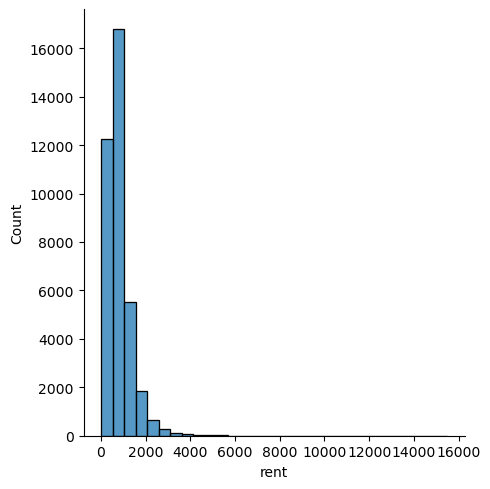

In [20]:
sns.displot(df_nodups['rent'], bins=30)


***Check the mean-rent***

In [21]:
df_nodups['rent'].mean() 

818.782824254991

***check the median-rent***

In [22]:
df_nodups['rent'].median()

650.0

***check the max-rent***

In [23]:
df_nodups['rent'].max() 

15500.0

***check the min-rent***

In [24]:
df_nodups['rent'].min() 

0.0

***check the median-nr. of rooms***

In [25]:
df_nodups['nr. of rooms'].median() 

3.0

***check the mean-nr.of rooms***

In [26]:
df_nodups['nr. of rooms'].mean() 

2.5924422468564745

***check the max-nr.of rooms***

In [27]:
df_nodups['nr. of rooms'].max()

200.0

***removing outliers from dataset***

In [28]:
df_nodups.drop(df_nodups[df_nodups['nr. of rooms'] >= 15].index, inplace = True)

In [29]:
df_nodups.drop(df_nodups[df_nodups['rent'] <= 400].index, inplace = True)

### 3. Data prep for regression analysis 

**HYPOTHESIS: the higher the number of rooms, the higher will be the rent**

**creating a scatterplot**

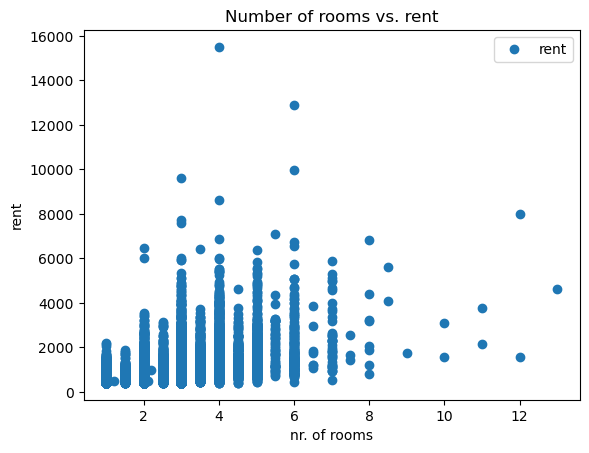

In [30]:
df_nodups.plot(x = 'nr. of rooms', y='rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of rooms vs. rent')  
plt.xlabel('nr. of rooms')  
plt.ylabel('rent')  
plt.show()

**Reshape the variables into NumPy arrays and put them into separate objects**

In [31]:
X = df_nodups['nr. of rooms'].values.reshape(-1,1)
y = df_nodups['rent'].values.reshape(-1,1)

In [32]:
X

array([[2.],
       [2.],
       [2.],
       ...,
       [4.],
       [4.],
       [3.]])

In [33]:
y

array([[ 887.  ],
       [ 690.  ],
       [1885.  ],
       ...,
       [ 525.  ],
       [1944.32],
       [ 410.  ]])

**Split data into a training set and a test set.**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

**Create a regression object**

In [35]:
regression = LinearRegression() 

**fitting the regression object in the training set.**

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

**predict the values of y based on X**

In [37]:
y_predicted = regression.predict(X_test)

**create a plot that shows the regression line from the model on the test set**

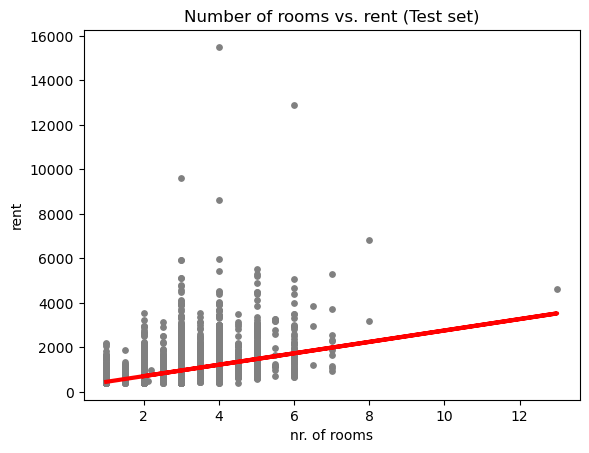

In [38]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of rooms vs. rent (Test set)')
plot_test.xlabel('nr. of rooms')
plot_test.ylabel('rent')
plot_test.show()

**the line does not seem to offer a valid representation of a positive correlation between nr. of rooms and rent prices. The distance between the line and the points seems quite large**

**Check MSE and R2 score**
**Create objects that includes the model summary statistics**

In [39]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

**show the model summary statistics**

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[256.41120039]]
Mean squared error:  289301.82602233527
R2 score:  0.1723566912265868


**Create a dataframe comparing the actual and predicted values of y**

In [41]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,834.56,704.918259
1,545.00,704.918259
2,990.00,704.918259
3,670.00,961.329459
4,519.00,704.918259
5,1571.92,961.329459
6,405.00,704.918259
7,630.00,1217.740660
8,470.00,704.918259
9,890.00,961.329459


**COMMENT: The summary statistics of the model clarifies that the model is inaccurate.
The variance in the actual vs prdicted values is way too large.
The slope is positive, which indicates that if nr. of rooms goes up, also rent goes up.
The low R2 score indicates a poor fit.
The high MSQ shows that the regression line is far away from the points, which means again that the regression line is not an accurate representation of the data.***


**Compare how the regression fits the training set**

In [46]:
y_predicted_train = regression.predict(X_train)

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[256.41120039]]
Mean squared error:  248487.45335649716
R2 score:  0.1862763144685139


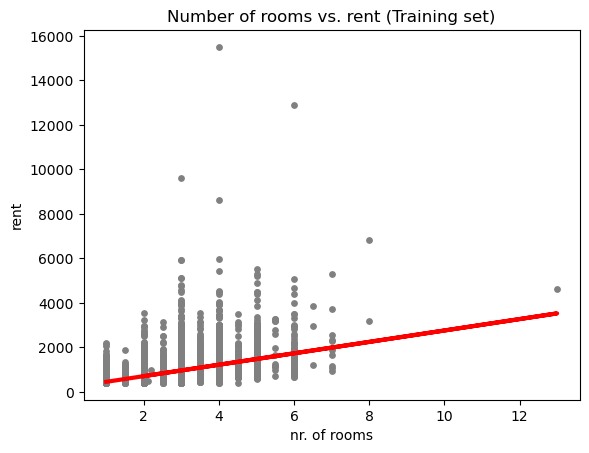

In [45]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of rooms vs. rent (Training set)')
plot_test.xlabel('nr. of rooms')
plot_test.ylabel('rent')
plot_test.show()

**We can see a similar outcome in the training set.
The Slope is similar to the Test set, the MSE is only marginally lower, the R2 is only marginally higher than the Training set.
All of the above make it clear that this is not a good model to use. 
It also proves again that a higher nr. of rooms do not necessarily results in a higher rent.**